<a/ id='top'></a>
# Homework 3: Random Variables and Their Distributions
***

**Name**: Adam Ten Hoeve

***

This assignment is due on Moodle by **5pm on Friday October 12**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
### [20 points] Problem 1

Suppose you are modeling the probability of observing flood levels of various heights when there is a storm in a particular coastal city.  Let $X$ be a random variable representing the observed flood height (in feet), which must be nonnegative. There are many different choices for probability density function (pdf) for $X$.  You decide to use the following pdf for $X$:

$$
f(x) = \begin{cases}
         c \ x \ e^{\left(-\frac{x^2}{10}\right)} & 0 \leq x < \infty \\
         0                           & \text{otherwise}
       \end{cases}
$$
where $c$ is some normalizing constant.

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid density function. 

For $f(x)$ to be valid, the following must be true:

$$\int_{-\infty}^{\infty}f(x)dx = 1$$

Because $f(x)$ is only non-zero when $x \geq 0$, we can rewrite our bands to be between $0$ and $\infty$. From here, we can solve the integral.

$$1 = c \int_{0}^{\infty} xe^{-\frac{x^2}{10}} dx$$

Use u-substitution: $u=-\frac{x^2}{10}$ leading to $du = -\frac{1}{5}xdx$ and $-5du = xdx$.

$$ 1 = c \int_{0}^{\infty} (-5du) * e^{u}$$

$$-\frac{1}{5} = c \Big[ e^u \Big]_0^{\infty}$$

$$-\frac{1}{5} = c \Big[ e^{-\frac{x^2}{10}} \Big]_0^{\infty}$$

$$-\frac{1}{5} = c \Big[ 0 - 1 \Big]$$

$$ \boxed {c = \frac{1}{5} }$$

**Part B**: Compute the cumulative density (cdf) function $F(x)$ for $X$.  Then, conduct two sanity checks: First, what should $F(0)$ equal?  Second, what should be the limit of $F(x)$ as $x \rightarrow \infty$?  Be sure to **justify** these answers. Verify that $F(0)$ and $\displaystyle \lim_{x\rightarrow \infty} F(x)$ satisfy your hypotheses using cdf you derived.

We can solve for $F(x)$ using the following equation:

$$F(x) = \int_{-\infty}^x f(x)dx$$

Again, because the probability is $0$ unitl $x \geq 0$, we can change the lower bound to equal zero.

$$ F(x) = \int_0^x \frac{1}{5}te^{-\frac{t^2}{10}} dt$$

Using the same u-substitution from **Part A**:

$$ F(x) = -\frac{1}{5} \Big[5e^{-\frac{t^2}{10}} \Big]_0^x$$

$$ F(x) = -\frac{1}{5} \Big( 5e^{-\frac{x^2}{10}} - 5 \Big) $$

$$ \boxed{ F(x) = 1 - e^{-\frac{x^2}{10}} } $$

Because $P(x < 0) = 0$, the CDF should be $0$ when $x = 0$ because there have been no positive probabilities. 
$$ F(0) = 1 - e^{-\frac{(0)^2}{10}} = 1 - 1 = 0 $$
The CDF should also be $1$ when the $\displaystyle \lim_{x\rightarrow \infty}$ because it covers all possible probabilities. 
$$ F(\infty) = 1 - e^{-\frac{(\infty)^2}{10}} = 1 - 0 = 1$$

**Part C:**  Use the cdf you derived in **Part B** to calculate the median, $\tilde{x}$, of the probability density for $X$.

The median would be the x-value when the CDF = $\frac{1}{2}$ because we would have covered half the data.

$$ \frac{1}{2} = 1 - e^{-\frac{\tilde{x}^2}{10}}$$

$$ \frac{1}{2} = e^{-\frac{\tilde{x}^2}{10}} $$

$$ \ln \Big( \frac{1}{2} \Big) = -\frac{\tilde{x}^2}{10}$$

$$ -\ln{2}= -\frac{\tilde{x}^2}{10}$$

$$ \boxed{ \tilde{x} = \sqrt{10 \ln{2}} }$$

**Part D**: It is a well-known fact that if there is a storm in your coastal city, if the flood level exceeds 6 feet, then the town will become inundated with octopuses in an event known localy as **Octogeddon**. Use the cdf you computed in **Part B** to find the probability that a given storm is an Octogeddon. 

An octogeddon occurs when $X > 6$. The probability that there is an octogeddon is therefor:

$$P(x > 6) = 1 - P(x \leq 6) = 1 - F(6)$$

Plug in $x=6$ to the CDF.

$$ F(6) = 1 - e^{-\frac{(6)^2}{10}}$$

Then solve for octogeddon.

$$ \boxed{ P(x > 6) = 1 - \Big( 1 - e^{-\frac{(6)^2}{10}} \Big) \approx 0.0273 }$$

**Part E:** You have been painstakingly collecting data on storms in your city, and have determined that storms occur at an average rate of 5 per year. To makes things a bit more precise, the pdf from **Part A** really describes the distribution of flood heights *given* that there is a storm, $P(X \mid \text{storm})$. You may assume that storms occur as independent events of one another.

What is the probability of observing 3 storms in a given year, none of which are Octogeddons?

That is, what is $P(3 \text{ non-Octogeddon storms} \cap 3 \text{ storms})$?

Using the equation for Conditional Probability: 

$$P(3 \text{ non-Octogeddon storms} \cap 3 \text{ storms}) = P (3 \text{ non-Octogeddon storms} \mid 3 \text{ storms})*P(3 \text{ storms})$$

Because the storms are independent, we can rewrite the $3$ non-Octogeddons as 3 different probabilities of non-Octogeddons occuring.

$$ P( \text{ non-Octogeddon1} \mid \text{storm1}) * P( \text{ non-Octogeddon2} \mid \text{storm2}) * P( \text{ non-Octogeddon3} \mid \text{storm3}) * P(3 \text{ storms})$$

A non-Octogeddon occurs when $X<6$ so we can rewrite our equation as:

$$ P( x < 6 \mid \text{storm1}) * P( x < 6 \mid \text{storm2}) * P( x < 6 \mid \text{storm3}) * P(3 \text{ storms})$$

Each $P(x < 6 \mid \text{storm})$ is the CDF $F(6) = 1 - e^{-\frac{(6)^2}{10}}$.

$$ F(6)*F(6)*F(6)*P(3 \text{ storms}) = F(6)^3*P(3 \text{ storms})$$

Let $Y$ be a Random Variable for the number of storms that occurs. $Y$ will then be characterized by a Poisson Distribution with rate $\lambda = 5$. The PMF of $Y$ is $P(Y=k) = e^{-5}*\frac{5^k}{k!}$. Therefor, the probability of $3$ storms occuring is: 

$$P(Y=3) = e^{-5}*\frac{5^3}{3!} = \frac{125}{6e^5}$$

Plug in all of our values into the above equation to get our final answer.

$$ \boxed { P(3 \text{ non-Octogeddon storms} \cap 3 \text{ storms}) =\Big( 1 - e^{-\frac{(6)^2}{10}} \Big)^3 * \frac{125}{6e^5} \approx 0.1292 } $$

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
### [20 points] Problem 2

You are waiting in line at the grocery store. It is taking _forever_!  There are only two lines open; one is being tended by a cashier named [John Henry](https://en.wikipedia.org/wiki/John_Henry_(folklore)), and the other is tended by a [self check-out machine](https://theconversation.com/the-economics-of-self-service-checkouts-78593). Like all human beings when they arrive at the front of the store to check-out and encounter lines everywhere, you first experience a moment of intense panic. _Which line will be the fastest?_ you wonder, as people shuffle around you.

You decide you need to model the arrival of customers at the front of each of the lines.  From your Intro to Data Science class you remember that the distribution of times _between_ independent arrivals is often modeled using an Exponential distribution.  You observe the following:
* John's line checks-out an average of 4 customers per ten minutes,
* the self check-out machine checks-out an average of 5 customers per ten minutes **if** the machine is working properly, 
* the self check-out machine checks-out an average of 1 customer per ten minutes if the machine is freezing up, and
* in any given moment, the self check-out machine has a probability of 0.1 of freezing up.

Answer the following questions about this scenario. **Note** that for **Parts B-D** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-customer times do in fact follow exponential distributions, what distributions do you expect the **number** of customers who pass through each line in a given 10-minute interval to follow?  What are the parameter(s) of each distribution?  Note that you should consider both the case where the self check-out is working properly and when it is broken.

The number of customers per line in 10 minute intervals is given by Poisson distributions. The PMF of a poison distribution is $P(X=k) = e^{-\lambda}*\frac{\lambda^k}{k!}$  

**John's Line:** John checks-out an average of 4 customers per 10 minutes, so the rate $\lambda = 4$. PMF is $P(X_J = k) = e^{-4}*\frac{4^k}{k!}$.  

**Working Self-Checkout**: Serves 5 people per 10 minutes, $\lambda = 5$. PMF is $P(X_W = k) = e^{-5}*\frac{5^k}{k!}$.   

**Frozen Self-Checkout**: Serves 1 person per 10 minutes, $\lambda = 1$. PMF is $P(X_W = k) = e^{-1}*\frac{1^k}{k!}$.

**Part B**:  What is the probability that 6 customers pass through John's line in the next 10 minutes?  What about the self check-out, assuming that it is working?  What about the self check-out, assuming that it is frozen?

In [2]:
# Function to solve Poisson Distributions with paramaters rate lambda and value k.
def Poisson(lam, k):
    return np.exp(-lam) * (lam**k) / (math.factorial(k))

In [3]:
# John's Line
John6 = Poisson(4,6)
print("The probability that 6 customers pass through John's checks-out is {:0.4}.".format(John6))

The probability that 6 customers pass through John's checks-out is 0.1042.


In [4]:
#Unfrozen machine
unFrozen6 = Poisson(5,6)
print("The probabillity that 6 customers pass through the working self check-out is {:0.4}.".format(unFrozen6))

The probabillity that 6 customers pass through the working self check-out is 0.1462.


In [5]:
# Frozen machine
frozen6 = Poisson(1,6)
print("The probability that 6 customers pass through the frozen self check-out is {:0.4}.".format(frozen6))

The probability that 6 customers pass through the frozen self check-out is 0.0005109.


**Part C:**  Use your answer to **Part B** and the Law of Total Probability to calculate the probability that the self check-out tends 6 customers is the next 10 minutes.

From the law of total probability:
$$P(X=6) = P(X=6 \mid \text{Not Frozen})P(\text{Not Frozen}) + P(X=6 \mid \text{Frozen})P( \text{Frozen})$$

The probabillity that the machine is frozen is $0.1$. Therefor the probability that it is not frozn is $0.9$. We can get the other two probabilities from **Part B**.

In [6]:
machine6 = unFrozen6*0.9 + frozen6*0.1
print("The probability that 6 people pass through the self check-out is {:0.4}.".format(machine6))

The probability that 6 people pass through the self check-out is 0.1317.


**Part D**:  S'pose John is working a 5-hour shift from 4-9 PM after school. He gets no breaks, because the year is 1870 and worker's rights is not yet a thing.  Calculate **exactly** (aside from rounding) the probability that he serves 100 or more customers during his shift.  (Assume we can safely scale our data up to a 5-hour interval.)

To solve for $P(x>100)$, we can instead calculate $P(x \geq 100) = 1 - P(x < 100) = 1 - F(99)$. We must then find the CDF. On average, John serves 4 customers per 10 minutes. Therefor, on average, he will serve 120 people in 5 hours on and his new rate is $\lambda = 120$. With this rate, the CDF is:

$$F(x) = \sum_{k=0}^{x}e^{-120}*\frac{120^k}{k!}$$

We are now able to solve for the probability $P(X \geq 100)$.

In [7]:
John99orLess = 0
for i in range(100):
    John99orLess += Poisson(120, i)
John100orMore = 1 - John99orLess
print("The probability that John serves 100 or more people in 5 hours is {:0.4}.".format(John100orMore))

The probability that John serves 100 or more people in 5 hours is 0.9721.


**Part E**:  Write a function `checkout_count` to simulate the number of customers served by the self check-out machine in a 5-hour shift. At the very least, your function should take as input the working and broken customer arrival rate parameters, and the probability that the machine is working properly. Your simulation should model the arrival of each new customer, and sample whether or not the machine is working properly for each new customer. Then, your function should simulate customer arrival times at the front of the line by sampling between-customer times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function, where the argument $\lambda$ will depend on the state of the machine (working or broken). Your function should return the number of customer arrivals in a 5-hour shift. Use at least 5000 simulations.

Use this function to estimate the probability of the self check-out machine serves 100 or more customers in a 5-hour shift, and report your result.

Finally, use **this same function**, to verify your answer to **Part D**.

**Caution!**  Be aware that in some Numpy or Scipy functions for distribution and/or random variables, the conventions for the parameter arguments may differ from those used in class.

In [8]:
def checkout_count(time_len, rate_work, rate_broken, p):#time_len is 300 min, rate_work = 150, rate_broken = 30, p = 0.1
    sims = 5000
    num_customers = np.zeros(sims)
    for i in range(sims):
        temp_time_len = time_len
        while(temp_time_len > 0):
            isFrozen = np.random.uniform(0,1) # Determines if is frozen or not. If this is < p, then is not frozen.
            if (isFrozen < p): # If is not frozen
                temp_time_len -= np.random.exponential(1/rate_work) * 10 # Time between customers per 10 minutes
                if temp_time_len > 0: # Check to make sure they don't go over 5 hours
                    num_customers[i] += 1 # Increase number of customers by 1
            else: # If is frozen
                temp_time_len -= np.random.exponential(1/rate_broken) * 10
                if temp_time_len > 0:
                    num_customers[i] += 1
    return num_customers, sims

In [9]:
# Prob that machine gets 100 or more customers
customersMachine, sims = checkout_count(300, 5, 1, 0.9)
customersMachineSum = 0
for i in customersMachine:
    if i > 100:
        customersMachineSum += 1
print("The probability that the machine checks-out 100 or more cusstomers is {:0.4}.".format(customersMachineSum/sims))

The probability that the machine checks-out 100 or more cusstomers is 0.6764.


In [10]:
# Prob that John gets 100 or more customers
customersJohn, sims = checkout_count(300, 4, 4, 1)
customersJohnSum = 0
for i in customersJohn:
    if i > 100:
        customersJohnSum += 1
print("The probability that John checks-out 100 or more customers is {:0.4}.".format(customersJohnSum/sims))

The probability that John checks-out 100 or more customers is 0.9666.


Notice that John's simulated probability is very similar to the amount calculated in **Part B**, thus verifying our calculated result.

**Part F:** Comment on the results you found in **Part E** for the probabilities that John and the self check-out machine will serve 100 or more customers in a 5-hour block. Which seems like a better investment for the grocery store?

From **Part E**, the probability 100 or more people will be checked out in 5 hours by the machine is $\sim 0.672$ and by John is $ \sim 0.971$. Therefor, John is a better investment because he will, on average, check-out a greater number of people than the automatic machine.

### [20 points] Problem 3 
***

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. For example, if we randomly draw the number \$20,695, then $X = 2.$
People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
there is empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledgers) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

**Part A**: Write a function pmf_natural that implements $f(x)$. Your function should take in an integer $x$ and return $f(x) = P(X = x)$.  Use your function to argue that $f(x)$ is a well-defined probability mass function. 

In [11]:
def pmf_natural(x):
    return np.log10((x+1)/x)

In [12]:
sum = 0
for i in range(1,10):
    fx = pmf_natural(i)
    print("When x = {}, P(X=i) = {:0.4f}".format(i, fx))
    sum += fx
print("The sum of probabilities of all events is {}.".format(sum))

When x = 1, P(X=i) = 0.3010
When x = 2, P(X=i) = 0.1761
When x = 3, P(X=i) = 0.1249
When x = 4, P(X=i) = 0.0969
When x = 5, P(X=i) = 0.0792
When x = 6, P(X=i) = 0.0669
When x = 7, P(X=i) = 0.0580
When x = 8, P(X=i) = 0.0512
When x = 9, P(X=i) = 0.0458
The sum of probabilities of all events is 1.0.


For a PMF to be well defined, it requires that there are no negative probabilities and that the sum over all events is 1. From the code above, we can see that the probabilities for $x = {1,2,...,9}$ are all non-negative and the sum of all probabilies is 1, so the PMF is well defined.

**Part B**: Use the function you wrote above to make two bar plots describing the pmf of the naturally occurring numbers as well as the discrete uniform distribution.  Make sure that the $x$- and $y$-limits on your plots are the same so that the two distributions are easy to compare. Please make one plot directly above the other. 

In [13]:
probsFraud = [1/9] * 9 # Data set for the Discrete Uniform Distribution
probsNatural = np.zeros(9)
for i in range(1,10):
    probsNatural[i-1] = pmf_natural(i) # Dataset for the naturally occuring numbers
# probsNatural = pd.DataFrame(probsNatural)

Text(0,0.5,'P(X=k)')

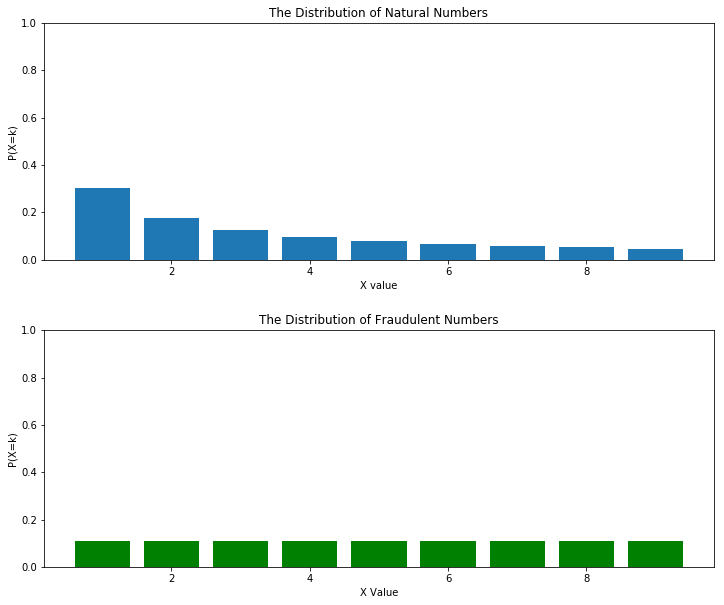

In [14]:
xaxis = [1,2,3,4,5,6,7,8,9]
fig,axs = plt.subplots(2,1,figsize = (12,10))
plt.subplots_adjust(hspace = 0.3)

axs[0].bar(x=xaxis,
           height = probsNatural,
           width = 0.8)
axs[0].set_ylim([0,1])
axs[0].set_title("The Distribution of Natural Numbers")
axs[0].set_xlabel("X value")
axs[0].set_ylabel("P(X=k)")

axs[1].bar(x=xaxis,
           height = probsFraud,
           width = 0.8,
           color = "green")
axs[1].set_ylim([0,1])
axs[1].set_title("The Distribution of Fraudulent Numbers")
axs[1].set_xlabel("X Value")
axs[1].set_ylabel("P(X=k)")

**Part C**: Write a function cdf_natural that implements the cumulative distribution function $F(y)$ for $X$ and use it to compute the probability that the leading digit in a number is at most 4 and at most 5. 

In [15]:
def cdf_natural(y): # Will loop through all discrete values <= y and return the sum of those pdf's.
    cdf = 0
    for i in range(1, y+1): # Will return sum of pdfs from 1 to y
        cdf += pmf_natural(i)
    return cdf

In [16]:
print("The probability that the leading digit is at most X=4 is {:0.4}.".format(cdf_natural(4)))
print("The probability that the leading digit is at most x=5 is {:0.4}.".format(cdf_natural(5)))

The probability that the leading digit is at most X=4 is 0.699.
The probability that the leading digit is at most x=5 is 0.7782.


**Part D**: The data in tax_data.txt contains the taxable income for individuals in 1978. Use Pandas and the information from **Parts A-D** to determine whether or not the dataset is likely fraudulent.  In addition to code and any graphical summaries, make sure to clearly justify your conclusion in words. 

In [17]:
file_path = "tax_data.txt"
dfIncome = pd.read_csv(file_path, 
                       header = 0,
                       sep = "\t",       # Have to separate data by the tab command
                       names = ["id", "income"]) # Split into two collumns

In [18]:
# dfIncome.head()
incomes = np.zeros(10)             # List for the frequency of the data
incomesNormalized = np.zeros(9)    # List for the cleaned data. Not including any #s that start with 0.
length = 0                         # The total number of entries in the cleaned data

for i, row in dfIncome.iterrows(): # For each row in the dataframe
    x = int(str(row["income"])[0]) # Gets the first letter each income amount
    incomes[x] += 1                # Increase the frequency of that number by 1
    if (x != 0):                   # This is for the cleaned and normalized dataset
        incomesNormalized[x-1] += 1
        length += 1
        
incomesNormalized = incomesNormalized / length # Convert the frequencies to probabilities
# print(incomes)
# print(incomesNormalized)

In [19]:
# Finding the PMF of the income data
for i in range(9):
    print("The probability that the leading digit is {} is {}.".format(i+1, incomesNormalized[i]))

The probability that the leading digit is 1 is 0.3278721146192624.
The probability that the leading digit is 2 is 0.21408861767046963.
The probability that the leading digit is 3 is 0.12356725921995224.
The probability that the leading digit is 4 is 0.089539665693818.
The probability that the leading digit is 5 is 0.07224728044574158.
The probability that the leading digit is 6 is 0.052149111170071635.
The probability that the leading digit is 7 is 0.04111170071637039.
The probability that the leading digit is 8 is 0.03936057309631202.
The probability that the leading digit is 9 is 0.04006367736800212.


In [20]:
# Finding the CDF of the income data
def IncomeCDF(y):
    sum = 0
    for i in range(1,y+1):
        sum += incomesNormalized[i]
    return sum

In [21]:
print("The probability that the leading digit of the income data is at most 4 is {}.".format(IncomeCDF(4)))
print("The probability that the leading digit of the income data is at most 5 is {}.".format(IncomeCDF(5)))

The probability that the leading digit of the income data is at most 4 is 0.49944282302998144.
The probability that the leading digit of the income data is at most 5 is 0.551591934200053.


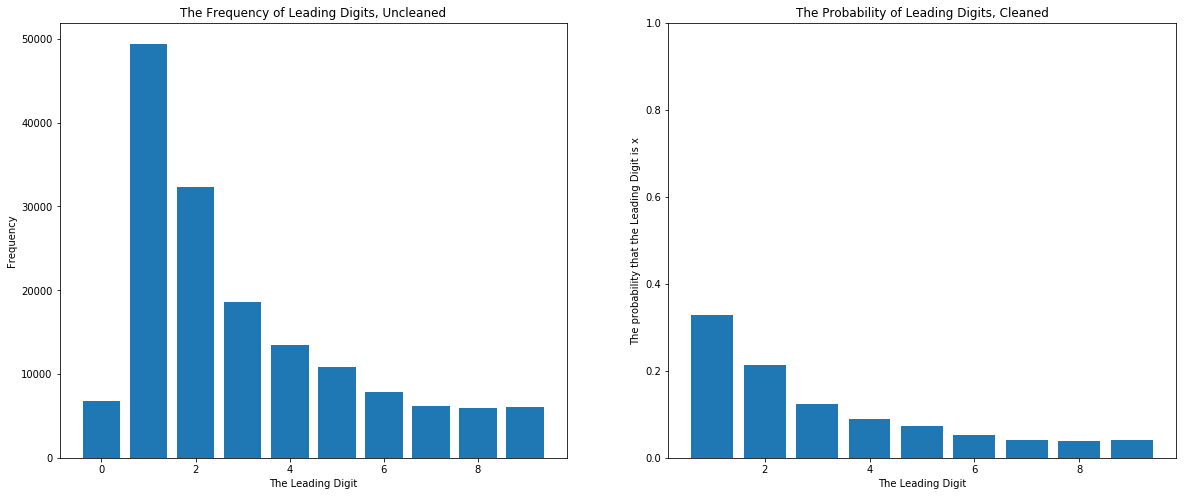

In [22]:
xaxis2 = [0,1,2,3,4,5,6,7,8,9] # Have to change the xaxis to include the numbers that begin with 0.
fig, ax = plt.subplots(1,2,figsize = (20,8))

ax[0].bar(x = xaxis2,
          height = incomes)
ax[0].set_xlabel("The Leading Digit")
ax[0].set_ylabel("Frequency")
ax[0].set_title("The Frequency of Leading Digits, Uncleaned")

ax[1].bar(x = xaxis,
          height = incomesNormalized)
ax[1].set_xlabel("The Leading Digit")
ax[1].set_ylabel("The probability that the Leading Digit is x")
ax[1].set_title("The Probability of Leading Digits, Cleaned")
ax[1].set_ylim([0,1]);


When comparing the plots above to the plots from **Part B**, it's clear that the data does not have a uniform distribution and follows closely with the PDF of the natural numbers. Similarly, by printing each probability for each leading digit from the incomes data, we can see that it the initial value, when $x=1$, is similar, with the calculated PMF having $P(x=1) = 0.301$ and the income data having $P(x=1) = 0.328$. The probabilities for the income data then decays slower than the calculated data, but the overall shape of the plot is the same. From these observations, it can be conclused that the data is not fraudulent.

### [20 points] Problem 4
***

Well. They're back at it. Tony and Dan are honing their lightsaber skills, and this time they've got a _new_ tournament format. (They wouldn't have had to switch formats, but you figured out all the probabilities for their previous tournament format two weeks ago, so this is on you.)

The new format is a _Best-of-9 Series_ of individual duels. The first professor to win 5 duels is declared the winner. Each duel can be considered to be independent of all previous duels. Moreover, a rigorous statistical analysis of Tony's and Dan's strengths, weaknesses, and handwriting, has revealed that Tony has an edge: the probability that Tony wins any one duel against Dan is given by $p=0.56$.

**Part A**: What is the probability that Tony wins the 9-duel series on the 8th duel? 

The probability that Tony wins on the eigth duel can be calculated with a negative binomial distribution because we know he wins the 8th duel. More specifically, Let X be a random variable for the number of Tony's wins. Then $X \sim NegBin(8,0.56)$ and for $X=8$, we will solve the distribution:

$$ \boxed{ f(8; 5,0.56) = {7 \choose 4}(0.56)^5(0.44)^3 \approx 0.1642 } $$

**Part B**: What is the probability that Tony wins the 9-duel series in _any_ valid number of duels? 

If we always know that Tony wins, then there will always be at least 5 duels. Therefor, the only thing that will change between each occurance is the number of duels that Dan wins, which will be between 0 and 4. In terms of a Negative Binomial Distribution, this will change $n$ the overall number of trials conducted.

$$ \boxed{ \sum_{k=0}^4{5-1+k \choose 5-1}(0.56)^5(0.44)^k = {4 \choose 4}(0.56)^5(0.44)^0 + ... + {8 \choose 4}(0.56)^5(0.44)^4 \approx 0.6449 } $$

**Part C**: The winner of the tournament will take home \$10,000 to use for a giant home aquarium for Stella the Octopus. Because the stakes are so high, Tony has decided to hire a famous Jedi consultant, Darth Ketelsen, to help him prepare for each duel. 

With Ketelsen's help, Tony's probability of winning any given match increases to $p = 0.7$. Ketelsen charges a fee of \$90 per game, but as a testament to her confidence in her abilities, only charges Tony the \$90 for games that he wins and _only if Tony wins the whole tournament_.  So, if Tony competes in a 9-duel tournament and wins, he will take home \$10,000 _minus_ \$450 for Darth Ketelsen's fees, for a total payout of \$9,550.  What is the expected payout for a 9-duel series?   

To solve the expected value, we must solve for the possible payouts and the probabilities of getting those payouts.  

$$ E[X] = (\text{Payout if Tony Wins})P(TonyWins) + (\text{Payout if Tony Loses})P(TonyLoses)$$

If Tony wins the tournament, then he won 5 duels under Ketelson's teachings and would win \$9,550. If Tony loses the tournament, then he will not be charged anything because Ketelson only charges him if he wins. Therefor the payouts are \$9,550 if he wins and \$0 if he loses.  

The probability that Tony wins the duel can be calculated with a negative binomial distribution with $p=0.7$ because of Tony's training. It is a negative binomial because if Tony wins the tournament, then we know he won the last duel. Because the tourament is a best-of-9, and we are assuming that Tony wins, to calculate the total probability of Tony winning, we must calculate the probability for rounds $n={5,6,7,8,9} depending on the number of round that Dan wins.

$$P(TonyWin)  = \sum_{k=0}^4 {5+k-1 \choose 5-1}(0.7)^5(0.3)^k \approx 0.9012$$

Knowing the probability that Tony wins, it is easy to calculate the probability that Tony looses because it is the compliment.  

$$P(TonyLose) = 1 - P(TonyWin) = 1 - 0.9012 \approx 0.0988$$

Plugging these values back in, we can calculate the expected value of the payout:

$$\boxed { E[X] = (9550)(0.9012) + (0)(0.0988) = 8606.46 \text{ dollars}} $$

In [23]:
# Probability that Tony wins the tournament
sum = 0
for i in range(5):
    sum += math.factorial(4+i) / math.factorial(i) / math.factorial(4) * (0.7)**5 * (0.3)**i # Negative Binomial
print(sum)

0.9011913399999996


**Part D**: This year the Jedi Knight Lightsaber-on-Lightsaber Association (the JKLOL Assoc) is implementing an experimental rule: Since Tony is rumored to be the stronger duelist, he gets to _choose_ the length of the championship tournament! Specifically, he can choose the series to be any odd length, from $N=3, 5, 7 \dots, 99$ duels long. Assuming that Tony continues to use the service of Darth Ketelsen, and considering the fact that Tony has a better-than-even chance of winning each duel, explain the trade-offs between choosing a short series vs. a long series in terms of Expected Payout. 

The more duels Tony decides to do, the greater the chance of him winning but the more money he will be paying to Darth Ketelsen. For example, if Tony chooses a best-of-3, the probability that he wins is $0.784$ but he will only spend \$180 on training, so he will keep \$9,820 of the winnings. On the other side, If Tony chooses a best-of-99, then he has a $0.99998$ probability of winning, but will spend \$4,500 on training, so will only walk away with \$5,500.

**Part E**: Write a function `optimal_series` that takes in $p$, the probability that Tony wins an individual duel, then computes the Expected Payout for each series of length $N=3, 5, 7, \ldots 99$ and returns the optimal series length.  In addition to returning the optimal series length, your function should also produce a plot of Expected Payout vs Series Length. You may write any additional helper functions that you like, but you should not change the API for the function optimal_series. 

In [24]:
def optimal_series(p):
    duels = [i for i in range(3, 100, 2)]           # Create list N = 3, 5, ..., 99
    EX = 0                                          # Temporary variable for expected value
    EXs = np.zeros(len(duels))
    EXindex = 0
    optimal_series_length = 0
    for i in duels:                                 # Iterate through all duels to find the most optimal expected value
        probTonyWin = TonyWins(i, p)                # Calc the prob that Tony wins with helper function bellow
        probTonyLose = 1 - probTonyWin              # Complement of the prob that Tony wins
        payoutTonyWin = 10000 - (90*math.ceil(i/2)) # Calculate Ketelsen's pay from the number of Tony wins
        payoutTonyLose = 0
        expectedValue = probTonyWin*payoutTonyWin + probTonyLose*payoutTonyLose
        if expectedValue > EX:                      # If calculated expected value is greater than the temp variable
            EX = expectedValue                      # Set to temp variable
            optimal_series_length = i               # Determine the # of duels that occured for that new expected value
        EXs[EXindex] = expectedValue                # Add stuff to an array to plot all the expected values
        EXindex += 1
    plot_optimal_series(EXs, duels)
    return optimal_series_length

In [25]:
# Find the probability that Tony Wins the tourament, given the best-of-number
def TonyWins(n, p): # Is a negative binomial, so need parameters for number of trials and prob of success
    wins = math.ceil(n/2) # Need the number of wins to win the tournament, which is the first value greater than half
    sum  = 0
    for i in range(wins): # Calculate the CDF for negative binomial, so finding P(x <= wins)
        sum += math.factorial(wins-1+i) / math.factorial(i) / math.factorial(wins-1) * (p**wins) * ((1-p)**i)
    return sum

In [26]:
# Plotting all the Cat's Pajamas
def plot_optimal_series(expectations, xaxis):
    fig,ax = plt.subplots(1,1,figsize = (12,8))
    ax.bar(x = xaxis,
           height = expectations,
           color = "dodgerblue")
    ax.set_title("The Expected Payouts Based on Number of Duels")
    ax.set_xlabel("The Number of Duels")
    ax.set_ylabel("Expected Payout in Dollars")
    return

Tony should choose to do 17 duels to get the optimal expected payout.


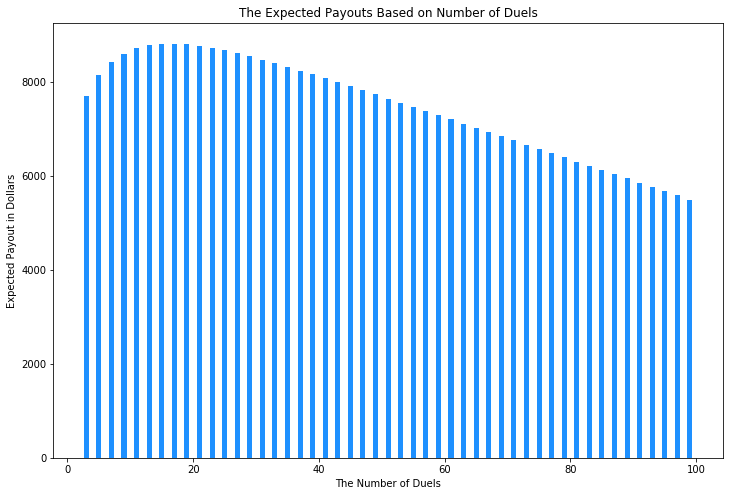

In [27]:
print("Tony should choose to do {} duels to get the optimal expected payout.".format(optimal_series(0.7)))

### [20 points] Problem 5

Cement your superior stochastic simulation skills by solving some straightforward simulation scenarios.

**Part A**: Using a stochastic simulation, compute the probability that, from a shuffled standard deck of cards, two cards are sequentially chosen which have either identical value or _adjacent_ value. You may let Aces be high or low, but not both.

In [28]:
# Create the deck
# Only need to care about the value of the card, not the suit, so will not take that into account.
def CreateDeck():
    deck = []
    for i in range(0, 400, 100): # For each suit, will be the hundreds digit to differentiate b/n cards.
        for j in range(1,14): # There are 13 different valued cards. Ace = 1
            deck.append(i+j)
    return deck

In [29]:
def CompareCards(sims):
    fullDeck = CreateDeck()
    totalSimilar = 0
    for i in range(sims):
        deck = fullDeck.copy()         # deck is reassigned to the full 52 cards
        card1 = np.random.choice(deck) # Pick the first card
        deck.remove(card1)             # Remove that card from the deck
        card2 = np.random.choice(deck) # Pick the second card
        difference = (card1 % 100) - (card2 % 100) # Find the difference between the values of the two cards
        if (difference <= 1 and difference >= -1): # If the same or adjacent
            totalSimilar += 1                      # Increase the adjacency counter
    return totalSimilar / sims # To returns the probability, return the number of adjacent events over the total events

In [30]:
print("The probability that the two cards are the same value or adjacent is {:0.4f}.".format(CompareCards(50000)))

The probability that the two cards are the same value or adjacent is 0.2057.


**Part B**: Using a stochastic simulation, compute the probability that, from a shuffled standard deck of cards, three cards are sequentially chosen which form a run, e.g. 4-5-6 or 9-10-J. (The cards do not need to be drawn in order, like 4,5,6... any order is fine, like 6,4,5.) You may let Aces be high or low, but not both.

In [31]:
def FindRun(sims):
    fullDeck = CreateDeck()
    totalRuns = 0
    for i in range(sims):
        deck = fullDeck.copy()
        card1 = np.random.choice(deck)     # Chose the first card
        deck.remove(card1)                 # Remove that card from the deck
        card2 = np.random.choice(deck)     # Choose the second card
        deck.remove(card2)
        card3 = np.random.choice(deck)     # Choose the third card
        cards = [card1 % 100, card2 % 100, card3 % 100]    # 
        cards.sort()
        if ((cards[1] - cards[0] == 1) and (cards[2] - cards[1] == 1)):
            totalRuns += 1
    return totalRuns / sims

In [32]:
print("The probability that 3 random cards form a run is {:0.4f}.".format(FindRun(50000)))

The probability that 3 random cards form a run is 0.0320.


**Part C**: When flipping over cards, sequentially, from a randomly shuffled deck, what is the probability that the third Ace will be revealed between flips 16 and 24, inclusively?

In [33]:
def FindThirdAce(sims):
    fullDeck = CreateDeck()
    aces = 0
    totalThirdAces = 0
    for i in range(sims):
        deck = fullDeck.copy() # Reset variables
        aces = 0
        for j in range(15): # Perform 15 random pulls. Count the number of aces.
            card = np.random.choice(deck)
            deck.remove(card)
            card = card % 100
            if card == 1: # Cound the number of aces that occur in first section
                aces += 1
        if aces >= 3: # If there has already been 3 aces, then can not be in flips 16-24, so dont complete loop
            continue
        for k in range(9): # Perform 8 more pulls and see if the third ace is there.
            card = np.random.choice(deck)
            deck.remove(card) # Remove the card from the deck
            card = card % 100
            if card == 1:  # Check if the card is an ace
                aces += 1
            if aces == 3:  # See if three aces have been revealed
                totalThirdAces += 1 # Increment the counter of third aces seen in 16-24.
                break      # Don't need to continue the loop
    return totalThirdAces / sims # Return the probability

In [34]:
print("The probability of finding the third ace between flips 16 and 24 is {:0.4f}.".format(FindThirdAce(50000)))

The probability of finding the third ace between flips 16 and 24 is 0.1828.


**Part D**: Using a stochastic simulation, determine the probability mass function for: the probability that the first card drawn is an $X$, given that the card was part of a 3-card sequence (as in Part B). Express your PMF as a bar graph. Explain why it has the shape that it has.

In [137]:
# P(X = k | run) = P(run | X)P(X) / P(run)    
def pmf(sims):
    probs = np.zeros(13)    # Initialize the array of probabilities
    probIndex = 0
    probX = 1/13            # P(X)
    probRun = FindRun(sims) # P(run)
    runGivenX = ProbRunGivenX(sims)  # array of P(run | X) for x = {1, 2, ..., 13}
    for i in range(1,14):   # For each card, so we can find the prob for each card
        probs[i-1] = runGivenX[i-1] * probX / probRun   # Calculate the prob of that card forming a run.
#     print(np.sum(probs))
    pmfPlot(probs)

In [138]:
# Probability that you get a run given first card is x, P(run | x)
def ProbRunGivenX(sims):
    run = np.zeros(13)
    fullDeck = CreateDeck()
    for i in range(sims):
        for i in range(1,14):
            deck = fullDeck.copy()
            deck.remove(i)
            card2 = np.random.choice(deck)    # Pull second card
            deck.remove(card2)
            card3 = np.random.choice(deck)    # Pull third card
            cards = [i, card2 % 100, card3 % 100]
            cards.sort()
            if ((cards[1] - cards[0] == 1) and (cards[2] - cards[1] == 1)): # See if they form a run
                run[i-1] += 1     # If so, increase the number of runs of that first number by 1
#     print(run)
#     print(run/sims)
    return(run/sims)

In [139]:
def pmfPlot(probs):
    xaxis = [i for i in range(1,14)]
    fig,ax = plt.subplots(1,1, figsize = (10,6))
    
    ax.bar(x = xaxis,
           height = probs)
    ax.set_title("The PDF of Each Value of Card Given it is in a Run")
    ax.set_xlabel("The Value of the Card")
    ax.set_ylabel("Probability")

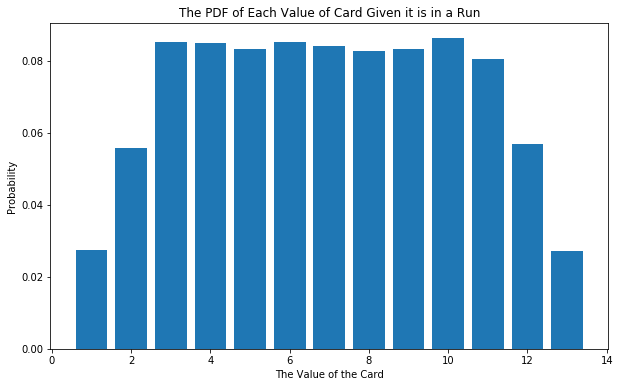

In [140]:
pmf(50000);

The shape of the plot makes sense because the cards with values 3 - 11 can form runs in three different ways. Given the first card has value k, a run can from if:

1. The two other cards have value k-1 and k-2.
1. The two other cards have value k-1 and k+1.
1. The two other cards have value k+1 and k+2.

If the first card is an ace with the value 1 then it can only form a run in one way, by pulling a 2 and a 3. Because of this, the probability that 1 has a run is roughly $1/3$ the chance that a card that has all three cases has a run. This is also true for Kings, as they can only get a run by pulling a Queen and a Jack. The 2 and Queen cards have 2 of the 3 ways to form a run, so havae $2/3$ the prob as normal. This explains why all the center cards have the same probability of getting a run while the cards on the edges has a smaller chance.